In [ ]:
!git clone https://github.com/aymen-fkir/kaggel_data.git

fatal: destination path 'kaggel_data' already exists and is not an empty directory.


In [ ]:
!mkdir house_price
!unzip kaggel_data/house-prices-advanced-regression-techniques.zip -d house_price

mkdir: cannot create directory ‘house_price’: File exists
Archive:  kaggel_data/house-prices-advanced-regression-techniques.zip
replace house_price/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
train = pd.read_csv("./house_price/train.csv")
test = pd.read_csv("./house_price/test.csv")

In [ ]:
train["Neighborhood"] = train["Neighborhood"].astype('category')
test["Neighborhood"] = test["Neighborhood"].astype('category')

In [ ]:
binary_series_train = pd.get_dummies(train['Neighborhood'], prefix='Neighborhood')
binary_series_test = pd.get_dummies(test['Neighborhood'], prefix='Neighborhood')

In [ ]:
train.drop(columns=["Neighborhood"],inplace =True)
train = pd.concat([train,binary_series_train],axis=1)
test.drop(columns=["Neighborhood"],inplace =True)
test = pd.concat([test,binary_series_test],axis=1)

In [ ]:
train = train.drop(columns = list(train.select_dtypes(include=['object']).columns))
test = test.drop(columns = list(test.select_dtypes(include=['object']).columns))

In [ ]:
train
# there is neiberhoods column make that column to categorical there is only 6 choices

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [ ]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(train["MasVnrArea"].mean())
test["MasVnrArea"] = test["MasVnrArea"].fillna(test["MasVnrArea"].mean())

In [ ]:
train = train.drop(columns=["GarageYrBlt"])
test = test.drop(columns=["GarageYrBlt"])

In [ ]:
train.drop(columns=["Id"],inplace=True)
ids = test.drop(columns=["Id"])

In [ ]:
# size,location,taxes,age

In [ ]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', '

In [ ]:
train["house_age"] = train["YrSold"] - train["YearBuilt"]
test["house_age"] = test["YrSold"] - test["YearBuilt"]

In [ ]:
train["YearRemodAdd"] = (train.YearBuilt != train.YearRemodAdd).astype(int)
test["YearRemodAdd"] = (test.YearBuilt != test.YearRemodAdd).astype(int)

In [ ]:
train["total_area"] = train["LotArea"] + train["MasVnrArea"]+ train["GarageArea"] + train["PoolArea"] + train["GrLivArea"]
test["total_area"] = test["LotArea"] + test["MasVnrArea"]+ test["GarageArea"] + test["PoolArea"] + test["GrLivArea"]


In [ ]:
train["finished_basement"] = train["TotalBsmtSF"] - train["BsmtUnfSF"]
test["finished_basement"] = test["TotalBsmtSF"] - test["BsmtUnfSF"]

In [ ]:
train["numSfperfloor"] = train["1stFlrSF"] + train["2ndFlrSF"]
test["numSfperfloor"] = test["1stFlrSF"] + test["2ndFlrSF"]

In [ ]:
train["numbaths"] = train["BsmtFullBath"] + train["BsmtHalfBath"] +train["FullBath"] +train["HalfBath"]
test["numbaths"] = test["BsmtFullBath"] + test["BsmtHalfBath"] +test["FullBath"] +test["HalfBath"]

In [ ]:
column_to_drop=["YearBuilt","YrSold","MoSold","LotArea","MasVnrArea", "GarageArea", "PoolArea" , "GrLivArea","GarageCars","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","2ndFlrSF","1stFlrSF","BsmtFullBath",	"BsmtHalfBath",	"FullBath",	"HalfBath"]
train.drop(columns=column_to_drop,inplace=True)
test.drop(columns=column_to_drop,inplace=True)

In [ ]:
train

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearRemodAdd,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,house_age,total_area,finished_basement,numSfperfloor,numbaths
0,60,65.0,7,5,0,0,3,1,8,0,...,0,0,0,0,0,5,10904.0,706,1710,4
1,20,80.0,6,8,0,0,3,1,6,1,...,0,0,0,0,1,31,11322.0,978,1262,3
2,60,68.0,7,5,1,0,3,1,6,1,...,0,0,0,0,0,7,13806.0,486,1786,4
3,70,60.0,7,5,1,0,3,1,7,1,...,0,0,0,0,0,91,11909.0,216,1717,2
4,60,84.0,8,5,0,0,4,1,9,1,...,0,0,0,0,0,8,17644.0,655,2198,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,6,5,1,0,3,1,7,1,...,0,0,0,0,0,8,10024.0,0,1647,3
1456,20,85.0,6,6,1,0,3,1,7,2,...,0,0,0,0,0,32,15867.0,953,2073,3
1457,70,66.0,7,9,1,0,4,1,9,2,...,0,0,0,0,0,69,11634.0,275,2340,2
1458,20,68.0,5,6,1,0,2,1,5,0,...,0,0,0,0,0,60,11035.0,1078,1078,2


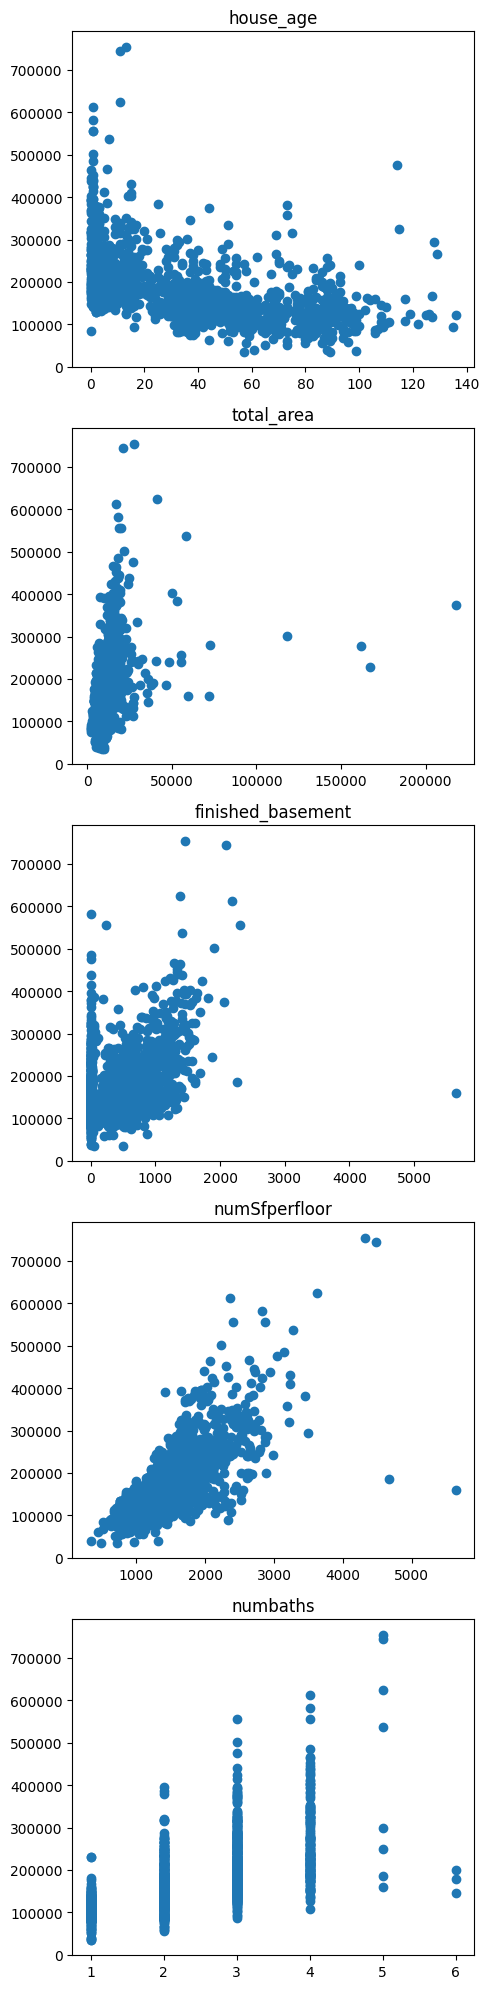

In [ ]:
fig,axs = plt.subplots(5,figsize = (5,20))
cols = ["house_age",	"total_area",	"finished_basement",	"numSfperfloor",	"numbaths"]
for i,col in enumerate(cols):
  axs[i].scatter(train[col], train['SalePrice'])
  axs[i].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
rfg = RandomForestRegressor(max_depth=7,random_state=0)
Y = train.SalePrice
X = train.drop(columns = ["SalePrice"])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
# rfg.fit(X_train,Y_train)
# rfg.score(X_test,Y_test)

In [ ]:
test["total_area"] = test.total_area.fillna(test.total_area.mean())
test["finished_basement"] = test.finished_basement.fillna(test.finished_basement.mean())
test["numbaths"] = test.numbaths.fillna(test.numbaths.mean())

In [ ]:
# cols =test.columns
# for col in cols:
#   if test[col].isna().any() == True:
#     test[col] = test[col].fillna(test[col].mean())

In [ ]:
test.isna().any()

Id                      False
MSSubClass              False
LotFrontage             False
OverallQual             False
OverallCond             False
YearRemodAdd            False
LowQualFinSF            False
BedroomAbvGr            False
KitchenAbvGr            False
TotRmsAbvGrd            False
Fireplaces              False
WoodDeckSF              False
OpenPorchSF             False
EnclosedPorch           False
3SsnPorch               False
ScreenPorch             False
MiscVal                 False
Neighborhood_Blmngtn    False
Neighborhood_Blueste    False
Neighborhood_BrDale     False
Neighborhood_BrkSide    False
Neighborhood_ClearCr    False
Neighborhood_CollgCr    False
Neighborhood_Crawfor    False
Neighborhood_Edwards    False
Neighborhood_Gilbert    False
Neighborhood_IDOTRR     False
Neighborhood_MeadowV    False
Neighborhood_Mitchel    False
Neighborhood_NAmes      False
Neighborhood_NPkVill    False
Neighborhood_NWAmes     False
Neighborhood_NoRidge    False
Neighborho

In [ ]:
ids = test["Id"]
test.drop(columns=["Id"],inplace=True)

In [ ]:
#pred = rfg.predict(test)

In [ ]:
grb = GradientBoostingRegressor(learning_rate=0.05,random_state=0,n_estimators=600,min_samples_split=5)
grb.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_split=5,
                          n_estimators=600, random_state=0)

In [ ]:
grb.score(X_test,Y_test)

0.8785276618374257

In [ ]:
pred = grb.predict(test)

In [ ]:
sub = pd.DataFrame(data={"SalePrice":pred},index=ids)
sub.to_csv("subbmission.csv")